<a href="https://colab.research.google.com/github/Marien-Bernard/Cricket/blob/main/INDVSAFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("HI")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


HI


In [ ]:
df=pd.read_csv("1384400.csv")
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1384400,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1,0.1,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1384400,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1,0.2,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1384400,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1,0.3,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1384400,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1,0.4,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1384400,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1,0.5,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mycricket=df.iloc[:,4:]
mycricket

,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,0.1,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.2,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.3,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.4,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.5,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2,34.2,India,Afghanistan,V Kohli,SS Iyer,Azmatullah Omarzai,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,2,34.3,India,Afghanistan,V Kohli,SS Iyer,Azmatullah Omarzai,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,2,34.4,India,Afghanistan,SS Iyer,V Kohli,Azmatullah Omarzai,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,2,34.5,India,Afghanistan,V Kohli,SS Iyer,Azmatullah Omarzai,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mycricket['ball_as_string']=mycricket['ball'].astype(str)
mycricket[['over','balls']] = mycricket['ball_as_string'].str.split('.', expand=True)
mycricket['over'] = pd.to_numeric(mycricket['over'])
mycricket['innings'] = pd.to_numeric(mycricket['innings'])
mycricket['ball'] = pd.to_numeric(mycricket['ball'])
mycricket['over'] = mycricket['over'] + 1

# Create a 'runs' column by adding 'runs_off_bat' and 'extras'
mycricket['runs'] = mycricket['runs_off_bat'] + mycricket['extras']

# Create a 'cum_runs' column by calculating the cumulative sum of 'runs'
mycricket['cum_runs'] = mycricket['runs'].cumsum()

mycricket['over'],['balls']


(0       1
 1       1
 2       1
 3       1
 4       1
        ..
 520    35
 521    35
 522    35
 523    35
 524    35
 Name: over, Length: 525, dtype: int64,
 ['balls'])

In [ ]:


# Assuming 'mycricket' is a Pandas DataFrame

# Select the relevant columns ('striker', 'runs_off_bat', 'innings')
batting = mycricket[['striker', 'runs_off_bat', 'innings']]

# Create new columns 'is_four' and 'is_six' using if-else conditions
batting['is_four'] = batting['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
batting['is_six'] = batting['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


<ipython-input-7-de15bd6384b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['is_four'] = batting['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
<ipython-input-7-de15bd6384b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['is_six'] = batting['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


In [ ]:
# Function to map innings to team
def map_innings_to_team(innings):
    if innings == 1:
        return 'Afghanistan'
    elif innings == 2:
        return 'India'
    else:
        return None  # Handle other cases as needed

# Add the 'team' column
batting['Team'] = batting['innings'].apply(map_innings_to_team)

<ipython-input-11-9b9578992e62>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Team'] = batting['innings'].apply(map_innings_to_team)


In [ ]:

# Group by 'striker' and calculate total runs, fours, and sixes
Batting_Overall = batting.groupby('striker').agg(
    total_runs=('runs_off_bat', 'sum'),
    total_balls_faced=('striker','count'),
    total_fours=('is_four', 'sum'),
    total_six=('is_six', 'sum'),
    total_dot_balls=('runs_off_bat', lambda x: (x == 0).sum()),  # Count of dot balls
).reset_index()

# Sort by total_runs in descending order
Batting_Overall = Batting_Overall.sort_values(by='total_runs', ascending=False)
Batting_Overall['Strike_Rate']=(Batting_Overall['total_runs']/Batting_Overall['total_balls_faced'])*100

Batting_Overall['Boundary_percentage'] = (((Batting_Overall['total_fours'] * 4) + (Batting_Overall['total_six'] * 6)) / Batting_Overall['total_runs']) * 100
# Calculate dot ball percentage
Batting_Overall['dot_ball_percentage'] = (Batting_Overall['total_dot_balls'] / Batting_Overall['total_balls_faced']) * 100


# Reset the index
Batting_Overall.reset_index(drop=True, inplace=True)

Batting_Overall

Batting_Overall = Batting_Overall.rename(columns={
    'striker': 'Batter',
    'total_runs': 'Runs',
    'total_balls_faced': 'Balls',
    'total_fours': '4s',
    'total_six': '6s',
    'total_dot_balls': 'Dots',
    'Strike_Rate': 'Strike_Rate',
    'Boundary_percentage': 'Boundary_percentage',
    'dot_ball_percentage': 'Dot_Ball_Percentage'
})

In [ ]:
grouped_batters = batting.groupby('innings')['striker'].unique().apply(list)

#print(grouped)
india_list = grouped_batters[2]  # Assuming 2 represents India's innings
afghanistan_list = grouped_batters[1]


india_list

['RG Sharma', 'Ishan Kishan', 'V Kohli', 'SS Iyer']

In [ ]:
india_batting = Batting_Overall[Batting_Overall['Batter'].isin(india_list)]
afghanistan_batting = Batting_Overall[Batting_Overall['Batter'].isin(afghanistan_list)]

india_batting

,Batter,Runs,Balls,4s,6s,Dots,Strike_Rate,Boundary_percentage,Dot_Ball_Percentage
0,RG Sharma,131,87,16,5,34,150.574713,71.755725,39.080460
3,V Kohli,55,57,6,0,23,96.491228,43.636364,40.350877
4,Ishan Kishan,47,48,5,2,27,97.916667,68.085106,56.250000
5,SS Iyer,25,24,1,1,8,104.166667,40.000000,33.333333


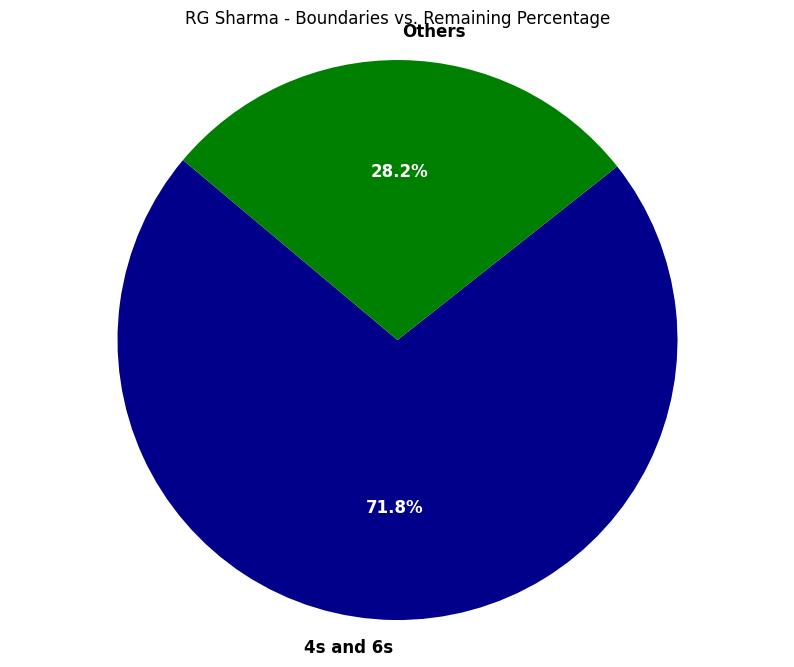

Batter                  RG Sharma
Runs                          131
Balls                          87
4s                             16
6s                              5
Dots                           34
Strike_Rate            150.574713
Boundary_percentage     71.755725
Dot_Ball_Percentage      39.08046
Name: 0, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


def generate_pie_chart(Batter_Name, data):
    batsman_data = Batting_Overall[Batting_Overall['Batter'] == Batter_Name]

    if batsman_data.empty:
        print(f"No data found for {Batter_Name}.")
        return

    total_runs = batsman_data['Runs'].values[0]
    total_runs_boundaries = (batsman_data['4s'].values[0] * 4) + (batsman_data['6s'].values[0] * 6)
    boundary_percentage = (total_runs_boundaries / total_runs) * 100
    non_boundary_percentage=(100-boundary_percentage)

    sizes = [boundary_percentage, non_boundary_percentage]
    labels = ['4s and 6s', 'Others']
    colors = ['darkblue', 'green']

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

    for text, autotext in zip(texts, autotexts):
        text.set(size=12, weight='bold', color='black')  # Label outside the pie
        autotext.set(size=12, weight='bold', color='white')  # Percentage inside the pie

    plt.title(f'{Batter_Name} - Boundaries vs. Remaining Percentage')
    plt.axis('equal')

    plt.show()
    return batsman_data.squeeze()

# Usage example
details=generate_pie_chart('RG Sharma', Batting_Overall)
print(details)

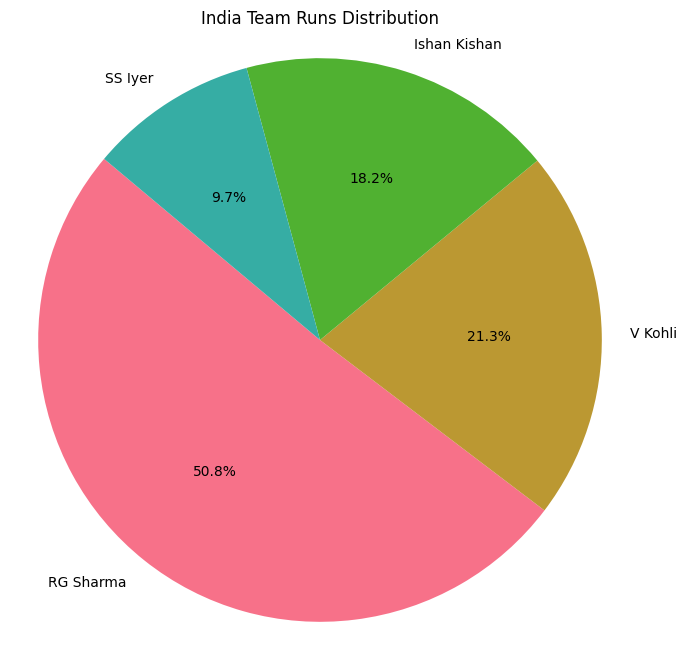

In [ ]:

# Create a custom colormap for the players
sns.set_palette("husl")

# Create a pie chart with dynamically assigned colors
plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(range(len(india_batting)))  # Automatically generates a colormap
plt.pie(india_batting['Runs'], labels=india_batting['Batter'], autopct='%1.1f%%', startangle=140)

plt.title('India Team Runs Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()